## LinkedAI json to Pascal VOC

Use this notebook to convert the json you download from https://platform.linkedai.co/labeler to a Pascal VOC format.

## Imports

In [2]:
import cv2
import json
from matplotlib import pyplot as plt
from os import walk
import xml.etree.ElementTree as ET

## Constants

To make it work upload your json file in the PATH folder you set for example ```tags/```, upload the image in PATH_IMAGE folder you set, for example ```images/``` if the image have a sub folder like ```images/test/``` set FOLDER as ```test/``` otherwise leave it blank. the FILE_NAME is the json file inside PATH folder and most be set as ```data.json```.

In [4]:
PATH = 'tags/'
PATH_IMG = 'images/'
FOLDER = 'test/'
FILE_NAME = 'data.json'

## Convert json to Pascal VOC

In [14]:
with open(PATH + FILE_NAME, 'r') as file:
    jsn = json.load(file)

for t in jsn:
    print(t['image'])
    image = cv2.imread(PATH_IMG + FOLDER + t['image'])

    xml_name = "tags/{}{}.xml".format(FOLDER, t['image'].split('.')[0])
    f = open(xml_name, "w")
    f.write("")
    f.close()

    f = open(xml_name, "a")
    f.write("<annotation>\n")
    f.write("	<folder>{}</folder>\n".format(FOLDER.replace('/', '')))
    f.write("	<filename>{}</filename>\n".format(t['image']))
    f.write("	<path>/{}{}{}</path>\n".format(PATH_IMG, FOLDER, t['image']))
    f.write("	<source>\n")
    f.write("		<database>Unknown</database>\n")
    f.write("	</source>\n")
    f.write("	<size>\n")
    f.write("		<width>{}</width>\n".format(image.shape[1]))
    f.write("		<height>{}</height>\n".format(image.shape[0]))
    f.write("		<depth>{}</depth>\n".format(image.shape[2]))
    f.write("	</size>\n")
    f.write	("	<segmented>0</segmented>\n")

    for tag in t['tags']:
        x_min = int(tag['pos']['x'])
        y_min = int(tag['pos']['y'])
        x_max = x_min + int(tag['pos']['w'])
        y_max = y_min + int(tag['pos']['h'])

        f.write("	<object>\n")
        f.write("		<name>{}</name>\n".format(tag['name']))
        f.write("		<pose>Unspecified</pose>\n")
        f.write("		<truncated>0</truncated>\n")
        f.write("		<difficult>0</difficult>\n")
        f.write("		<bndbox>\n")
        f.write("			<xmin>{}</xmin>\n".format(x_min))
        f.write("			<ymin>{}</ymin>\n".format(y_min))
        f.write("			<xmax>{}</xmax>\n".format(x_max))
        f.write("			<ymax>{}</ymax>\n".format(y_max))
        f.write("		</bndbox>\n")
        f.write("	</object>\n")
    f.write("</annotation>\n")
    f.close()
    print("Total tags: {}".format(len(t['tags'])))
    print('DONE')
#     f = open(xml_name, "r")
#     print(f.read())
#     f.close()

frame300.jpg
Total tags: 14
DONE
frame301.jpg
Total tags: 17
DONE
frame302.jpg
Total tags: 18
DONE
frame303.jpg
Total tags: 20
DONE
frame304.jpg
Total tags: 24
DONE
frame305.jpg
Total tags: 26
DONE


## Test the new Pascal VOC, drawing over the image

frame300.xml
Total tags: 14


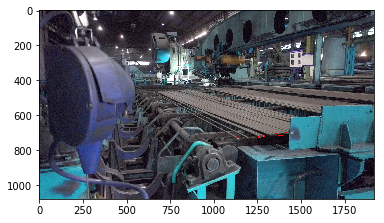

frame301.xml
Total tags: 17


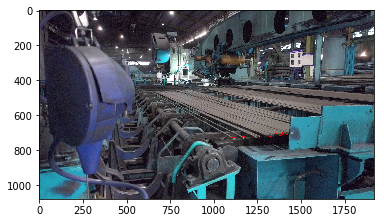

frame302.xml
Total tags: 18


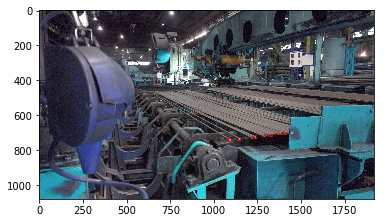

frame303.xml
Total tags: 20


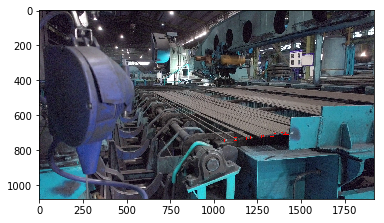

frame304.xml
Total tags: 24


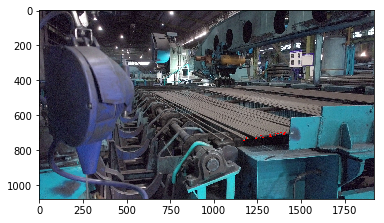

frame305.xml
Total tags: 26


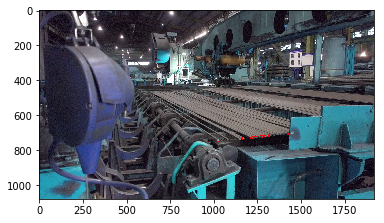

In [10]:
from xml.dom import minidom

f = []
for (dirpath, dirnames, filenames) in walk(PATH + FOLDER):
    f.extend(filenames)
    break

for name in f:
    mydoc = minidom.parse(PATH + FOLDER + name)
    print(name)
    objects = mydoc.getElementsByTagName('object')

    image = cv2.imread(PATH_IMG + FOLDER + mydoc.getElementsByTagName('filename')[0].firstChild.data)

    count = 0
    for obj in objects:
        xmin = obj.getElementsByTagName('xmin')[0].firstChild.data
        xmax = obj.getElementsByTagName('xmax')[0].firstChild.data
        ymin = obj.getElementsByTagName('ymin')[0].firstChild.data
        ymax = obj.getElementsByTagName('ymax')[0].firstChild.data

        image = cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 1) 
        
        count += 1

    print('Total tags: {}'.format(count))
    plt.imshow(image)
    plt.show()
